Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

Import data

In [2]:
df_initial = pd.read_csv('project_data.csv', delimiter=';')
df_initial.head()

X01  X02  X03  X04   X05  X06  X07  X08  X09   X10  ...   X12 X13   X14  \
0  A11    6  A34  A43  1169  A65  A75    4  A93  A101  ...  A121  67  A143   
1  A12   48  A32  A43  5951  A61  A73    2  A92  A101  ...  A121  22  A143   
2  A14   12  A34  A46  2096  A61  A74    2  A93  A101  ...  A121  49  A143   
3  A11   42  A32  A42  7882  A61  A74    2  A93  A103  ...  A122  45  A143   
4  A11   24  A33  A40  4870  A61  A73    3  A93  A101  ...  A124  53  A143   

    X15 X16   X17 X18   X19   X20  Y  
0  A152   2  A173   1  A192  A201  1  
1  A152   1  A173   1  A191  A201  2  
2  A152   1  A172   2  A191  A201  1  
3  A153   1  A173   2  A191  A201  1  
4  A153   2  A173   2  A191  A201  2  

[5 rows x 21 columns]

In [3]:
continuous_vars = ['X02',  'X05', 'X13','X11','X16', 'X18','X08']
categorical_vars = ['X01', 'X03','X04', 'X06','X07','X09','X10','X12','X14','X15','X17','X19','X20']

In [4]:
df=df_initial.copy()

In [5]:
df_initial['X01'] = df_initial['X01'].map({'A14':0, 'A11':1, 'A12':2, 'A13':3})
df_initial['X03'] = df_initial['X03'].map({'A30':0, 'A31':1, 'A32':2, 'A33':3,'A34':4})
df_initial['X06'] = df_initial['X06'].map({'A65':0, 'A61':1, 'A62':2, 'A63':3,'A64':4})
df_initial['X07'] = df_initial['X07'].map({'A71':0, 'A72':1, 'A73':2, 'A74':3,'A75':4})
df_initial['X17'] = df_initial['X17'].map({'A171':0, 'A172':1, 'A173':2, 'A174':3})

df_initial['X08'] = df_initial['X08'].map({1:0, 2:1, 3:2, 4:3})
df_initial['X11'] = df_initial['X11'].map({1:0, 2:1, 3:2, 4:3})
df_initial['X16'] = df_initial['X16'].map({1:0, 2:1, 3:2, 4:3})
df_initial['X18'] = df_initial['X18'].map({1:0, 2:1})

In [6]:
df_initial['X19'] = df_initial['X19'].map({'A191':0, 'A192':0})
df_initial['X20'] = df_initial['X20'].map({'A201':1, 'A202':0})
df_initial['Y'] = df_initial['Y'].map({2:1, 1:0})# bad customers are of class 1

### Feature selection(categorical) using chi-squared

In [7]:
df_initial

X01  X02  X03  X04   X05  X06  X07  X08  X09   X10  ...   X12 X13   X14  \
0      1    6    4  A43  1169    0    4    3  A93  A101  ...  A121  67  A143   
1      2   48    2  A43  5951    1    2    1  A92  A101  ...  A121  22  A143   
2      0   12    4  A46  2096    1    3    1  A93  A101  ...  A121  49  A143   
3      1   42    2  A42  7882    1    3    1  A93  A103  ...  A122  45  A143   
4      1   24    3  A40  4870    1    2    2  A93  A101  ...  A124  53  A143   
..   ...  ...  ...  ...   ...  ...  ...  ...  ...   ...  ...   ...  ..   ...   
995    0   12    2  A42  1736    1    3    2  A92  A101  ...  A121  31  A143   
996    1   30    2  A41  3857    1    2    3  A91  A101  ...  A122  40  A143   
997    0   12    2  A43   804    1    4    3  A93  A101  ...  A123  38  A143   
998    1   45    2  A43  1845    1    2    3  A93  A101  ...  A124  23  A143   
999    2   45    4  A41  4576    2    0    2  A93  A101  ...  A123  27  A143   

      X15 X16  X17  X18  X19  X20  Y  
0    A152   1    2    0    0    1  0  
1    A152   0    2    0    0    1  1  
2    A152   0    1    1    0    1  0  
3    A153   0    2    1    0    1  0  
4    A153   1    2    1    0    1  1  
..    ...  ..  ...  ...  ...  ... ..  
995  A152   0    1    0    0    1  0  
996  A152   0    3    0    0    1  0  
997  A152   0    2    0    0    1  0  
998  A153   0    2    0    0    1  1  
999  A152   0    2    0    0    1  0  

[1000 rows x 21 columns]

In [8]:
from scipy.stats import chi2_contingency, ttest_ind

feature = []
p = []
chi_2 = []

for i in categorical_vars[:-1]:
    feature.append(i)
    result =chi2_contingency( pd.crosstab(df_initial['Y'],df_initial[i]))
    p.append(round(float(result[1]),6))   
    if float(result[1]) < 0.01:
        chi_2.append("Significant")
    else:
        chi_2.append("Insignificant")

In [9]:
chi = pd.DataFrame(data={'P value':p,'Significance':chi_2},index=feature)
chi

P value   Significance
X01  0.000000    Significant
X03  0.000000    Significant
X04  0.000116    Significant
X06  0.000000    Significant
X07  0.001045    Significant
X09  0.022238  Insignificant
X10  0.036056  Insignificant
X12  0.000029    Significant
X14  0.001629    Significant
X15  0.000112    Significant
X17  0.596582  Insignificant
X19  1.000000  Insignificant

## Check student T test for numerical features selection

In [10]:
def t_test(df,columns):    
    feature = []
    p = []
    t_test = []
    
    for i in columns:
        feature.append(i)
        result = ttest_ind(df[df["Y"]==0][i], df[df["Y"]==1][i])
        p.append(round(float(result[1]),6))
        
        if float(result[1]) < 0.01:
            t_test.append("Significant")
        else:
            t_test.append("Insignificant")
    
    return(pd.DataFrame(index=feature,data={'P Value':p,'Significance':t_test}))

In [11]:
df_t_test = t_test(df_initial, continuous_vars)
df_t_test

P Value   Significance
X02  0.000000    Significant
X05  0.000001    Significant
X13  0.003925    Significant
X11  0.925337  Insignificant
X16  0.148420  Insignificant
X18  0.924141  Insignificant
X08  0.022035  Insignificant

In [12]:
df_initial = df_initial.drop(columns = df_t_test[df_t_test['Significance'] == 'Insignificant'].index, axis=1)

In [13]:
df_initial = df_initial.drop(columns = chi[chi['Significance'] == 'Insignificant'].index, axis=1)

In [14]:
df_initial = df_initial.drop(['Y'],axis=1)

In [15]:
#Final dataframe with significant features

In [16]:
df_initial

X01  X02  X03  X04   X05  X06  X07   X12  X13   X14   X15  X20
0      1    6    4  A43  1169    0    4  A121   67  A143  A152    1
1      2   48    2  A43  5951    1    2  A121   22  A143  A152    1
2      0   12    4  A46  2096    1    3  A121   49  A143  A152    1
3      1   42    2  A42  7882    1    3  A122   45  A143  A153    1
4      1   24    3  A40  4870    1    2  A124   53  A143  A153    1
..   ...  ...  ...  ...   ...  ...  ...   ...  ...   ...   ...  ...
995    0   12    2  A42  1736    1    3  A121   31  A143  A152    1
996    1   30    2  A41  3857    1    2  A122   40  A143  A152    1
997    0   12    2  A43   804    1    4  A123   38  A143  A152    1
998    1   45    2  A43  1845    1    2  A124   23  A143  A153    1
999    2   45    4  A41  4576    2    0  A123   27  A143  A152    1

[1000 rows x 12 columns]

In [17]:
df_cluster=pd.DataFrame()
df_cluster['Credit amount'] = df_initial['X05']
df_cluster['Age'] = df_initial['X13']
df_cluster['Duration'] = df_initial['X02']


df_cluster['checking account'] = df_initial['X01']
df_cluster['Savings'] = df_initial['X06']
df_cluster['Credit History'] = df_initial['X03']
df_cluster['Purpose'] = df_initial['X04']
df_cluster['Employment'] = df_initial['X07']
df_cluster['Property'] = df_initial['X12']
df_cluster['Installment_plans'] =df_initial['X14']
df_cluster['Housing'] = df_initial['X15']

df_cluster.head()

Credit amount  Age  Duration  checking account  Savings  Credit History  \
0           1169   67         6                 1        0               4   
1           5951   22        48                 2        1               2   
2           2096   49        12                 0        1               4   
3           7882   45        42                 1        1               2   
4           4870   53        24                 1        1               3   

  Purpose  Employment Property Installment_plans Housing  
0     A43           4     A121              A143    A152  
1     A43           2     A121              A143    A152  
2     A46           3     A121              A143    A152  
3     A42           3     A122              A143    A153  
4     A40           2     A124              A143    A153

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled=df_cluster.copy()
df_scaled[['Age','Duration','Credit amount']] = scaler.fit_transform(df_scaled[['Age','Duration','Credit amount']])

In [19]:
import gower
from sklearn_extra.cluster import KMedoids

gower_mat = gower.gower_matrix(df_scaled,  cat_features = [False,False,False,True ,True, True, True, True,True,True,True])

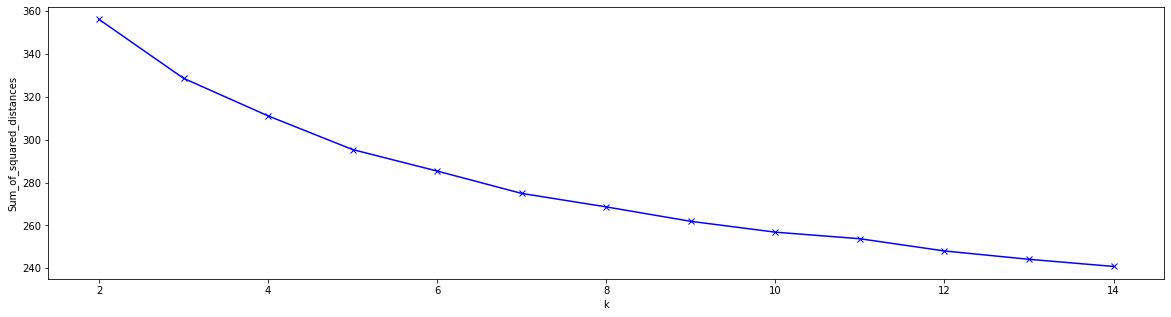

In [21]:
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMedoids(n_clusters = k, random_state = 0,  metric = 'precomputed', method = 'pam', init =  'k-medoids++').fit(gower_mat)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.show()

K-Medoids clusters


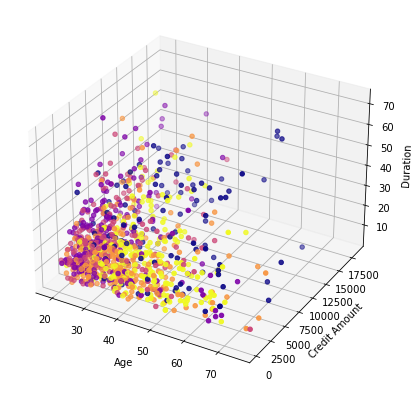

In [22]:
from mpl_toolkits.mplot3d import Axes3D

model = KMedoids(n_clusters = 5, random_state = 0, metric = 'precomputed', method = 'pam', init =  'k-medoids++').fit(gower_mat)
kmedoids_labels = model.labels_

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['Age'],df_cluster['Credit amount'],df_cluster['Duration'],c=kmedoids_labels, cmap='plasma')
xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("K-Medoids clusters")

In [23]:
df_clustered_kmedoids = df_cluster.assign(Cluster=kmedoids_labels)
grouped_kmedoids = df_clustered_kmedoids.groupby(['Cluster']).mean().round(1)

grouped_kmedoids

Credit amount   Age  Duration  checking account  Savings  \
Cluster                                                             
0               5466.8  43.2      29.3               1.2      1.1   
1               3328.2  30.5      21.7               1.7      1.2   
2               3301.6  31.1      22.6               1.1      1.2   
3               2476.6  35.1      16.2               0.6      1.3   
4               3035.9  40.8      20.0               0.5      1.1   

         Credit History  Employment  
Cluster                              
0                   2.3         2.9  
1                   2.1         2.1  
2                   2.3         1.8  
3                   2.4         2.1  
4                   3.4         3.2

In [24]:
#agglomerative clustering

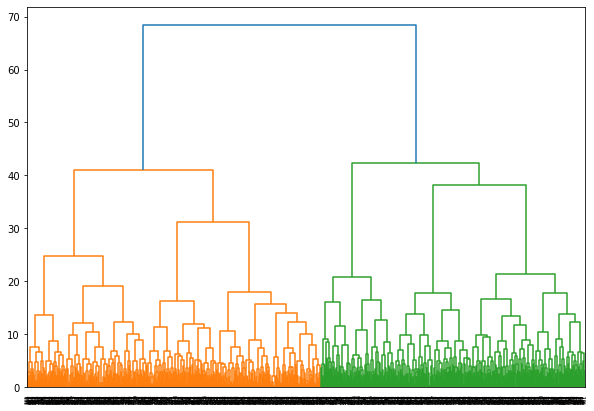

In [24]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(gower_mat, method='ward'))

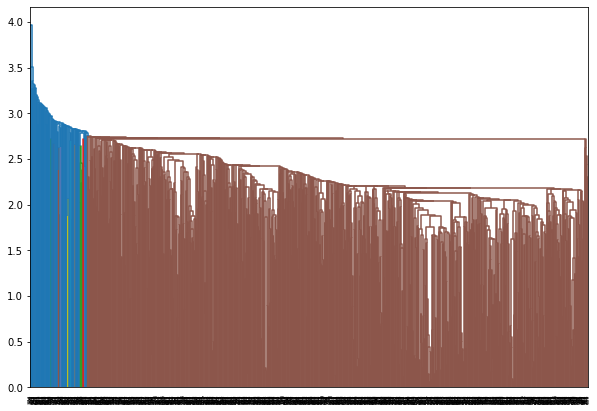

In [25]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(gower_mat, method='single'))

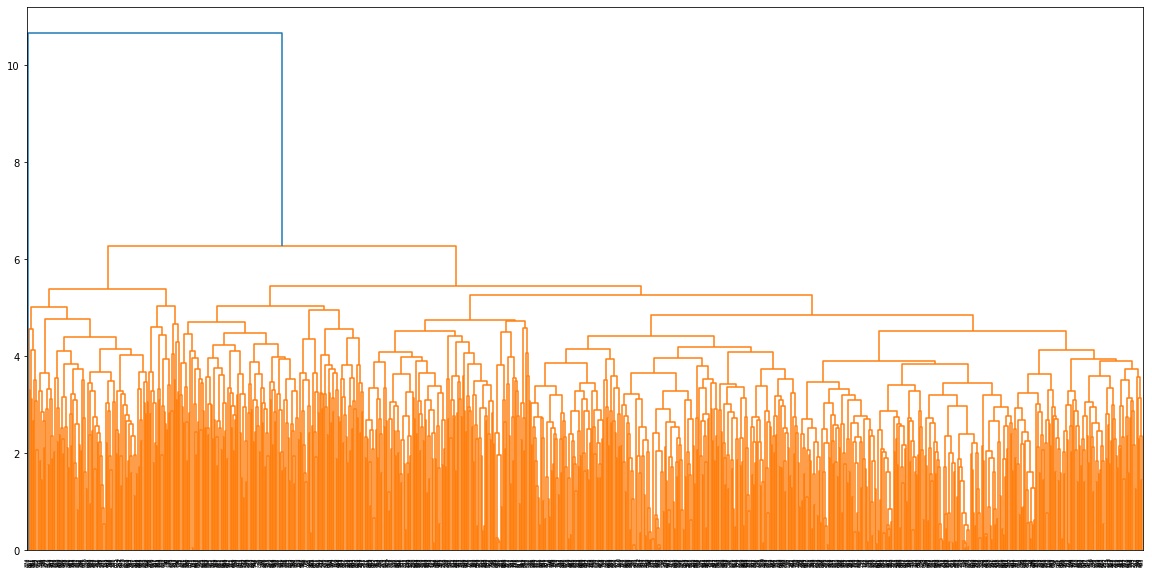

In [26]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(gower_mat, method='average'))

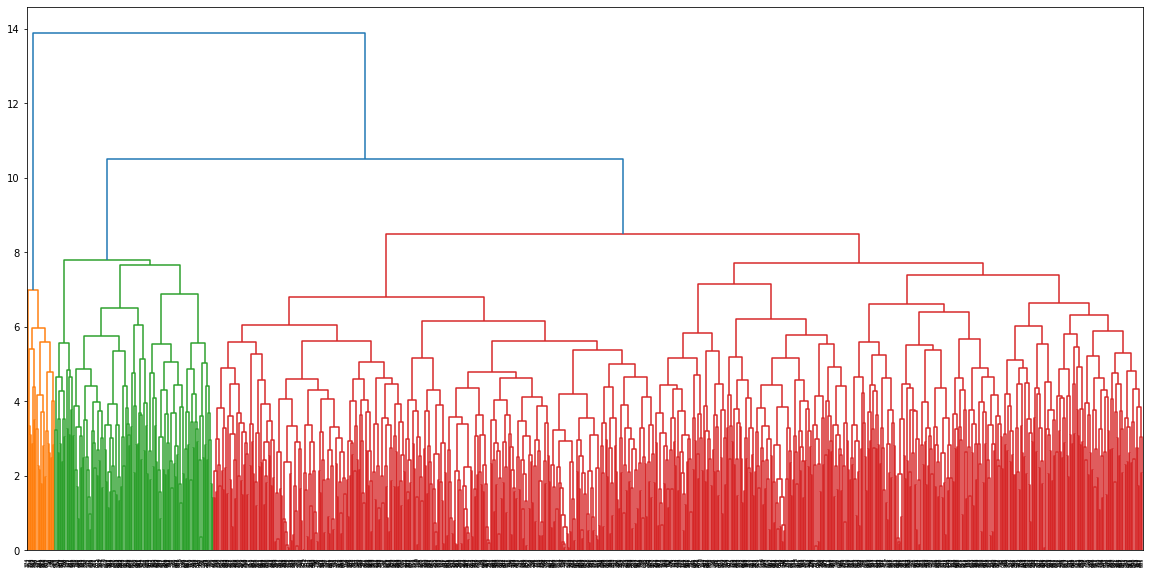

In [27]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(gower_mat, method='complete'))

Hierarchical Agglomerative Clustering


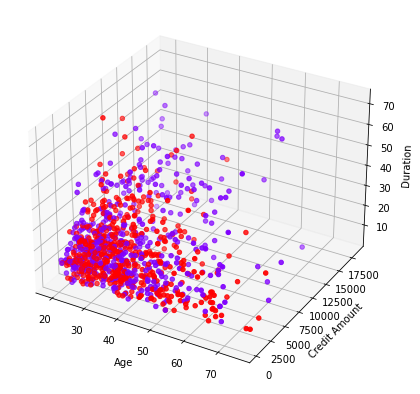

In [26]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(gower_mat)
agg_labels = model.labels_

fig = plt.figure(num=None, figsize=(10, 7))
ax = plt.axes(projection="3d")
ax.scatter3D(df_cluster['Age'],df_cluster['Credit amount'],df_cluster['Duration'],c=agg_labels, cmap='rainbow')
xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("Hierarchical Agglomerative Clustering")

In [27]:
df_clustered_agg = df_cluster.assign(Cluster=agg_labels)
grouped_agg = df_clustered_agg.groupby(['Cluster']).mean().round(1)
grouped_agg

Credit amount   Age  Duration  checking account  Savings  \
Cluster                                                             
0               3842.5  35.3      22.7               1.1      1.2   
1               2758.6  35.8      19.3               0.9      1.1   

         Credit History  Employment  
Cluster                              
0                   2.4         2.4  
1                   2.7         2.4

In [28]:
df_clustered_agg.groupby('Cluster')['checking account'].value_counts()


Cluster  checking account
0        1                   151
         2                   148
         0                   143
         3                    31
1        0                   251
         1                   123
         2                   121
         3                    32
Name: checking account, dtype: int64

DBSCAN


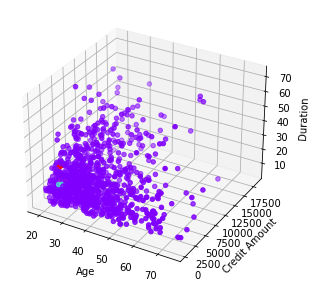

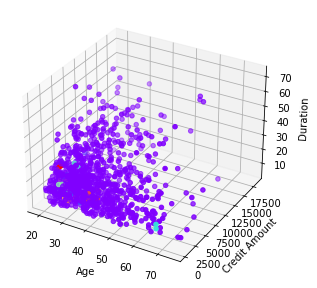

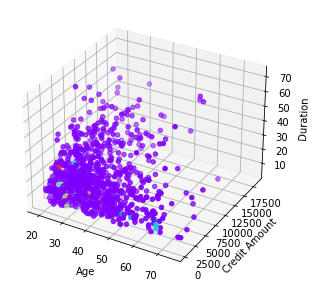

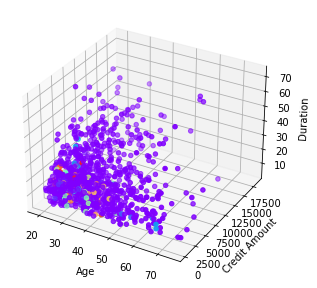

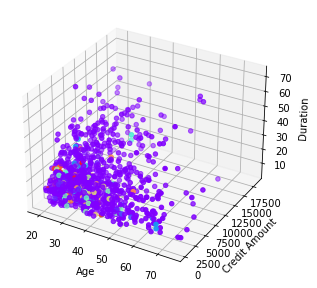

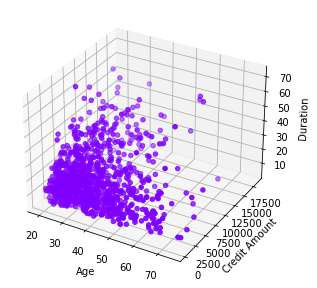

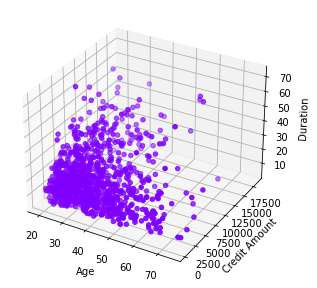

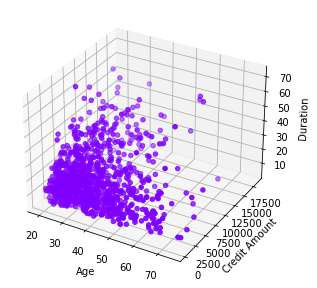

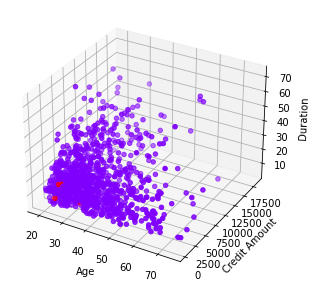

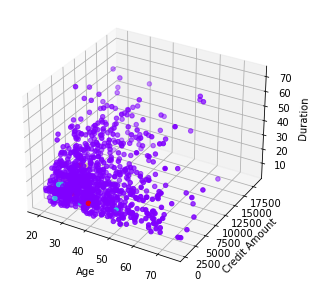

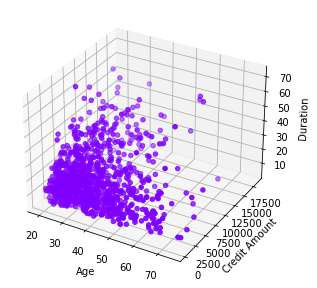

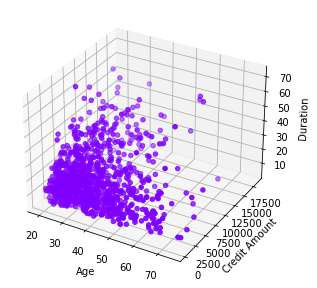

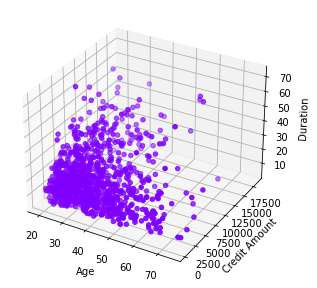

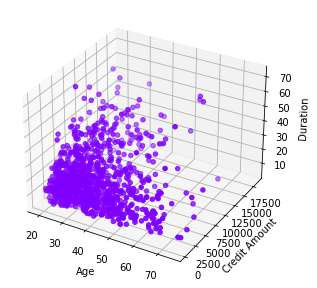

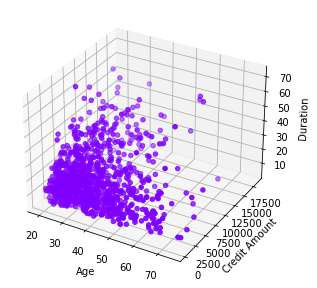

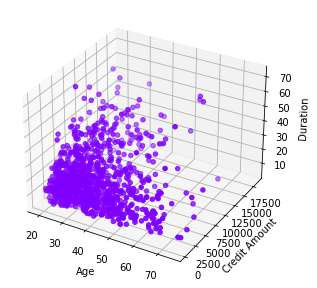

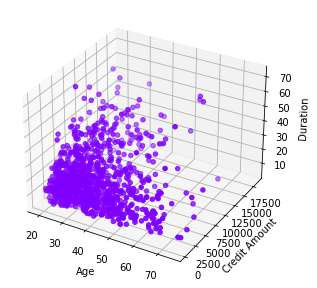

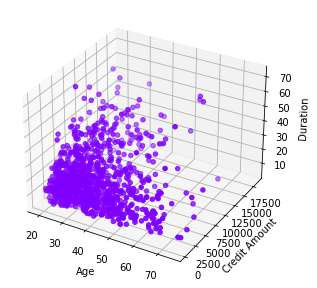

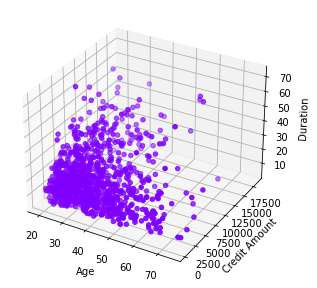

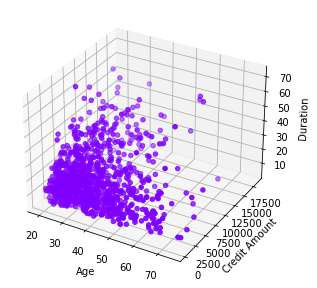

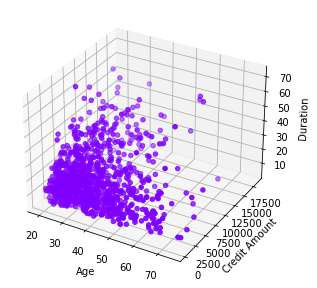

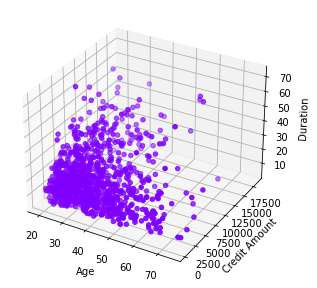

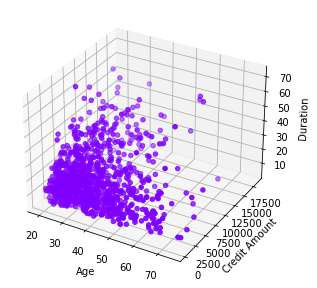

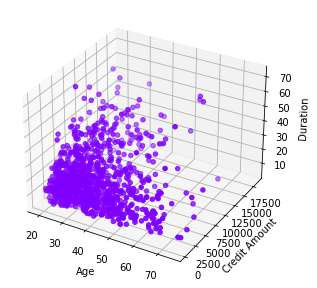

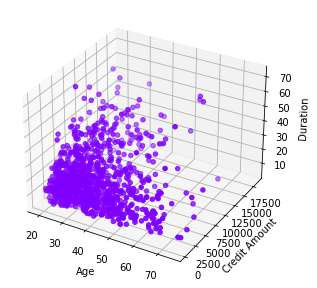

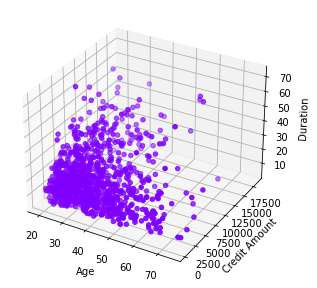

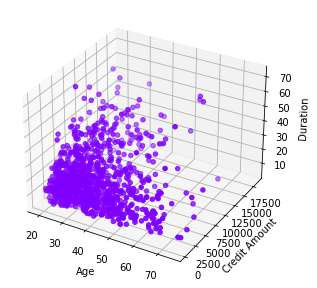

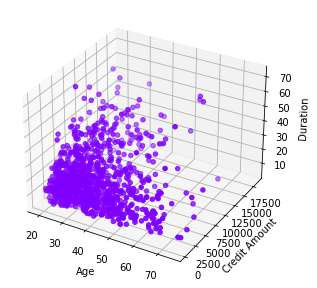

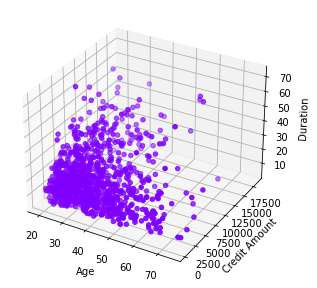

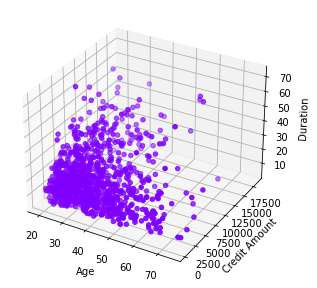

In [29]:
from sklearn.cluster import DBSCAN

range_min = [2,5,8,10,15,20]
range_eps = [0.1,0.2,0.3,0.5,0.6] 

for m in range_min:
    for e in range_eps:
        model = DBSCAN(eps=e,min_samples=m).fit(gower_mat)
        dbs_labels = model.labels_

        fig = plt.figure(num=None, figsize=(8, 5))
        ax = plt.axes(projection="3d")
        ax.scatter3D(df_cluster['Age'],df_cluster['Credit amount'],df_cluster['Duration'],c=dbs_labels, cmap='rainbow')
        xLabel = ax.set_xlabel('Age', linespacing=3.2)
        yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
        zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("DBSCAN")

## Validate Kmeans and Agglomerative clustering results using Silhoutte score

n = 2  : average silhouette_score : 0.063


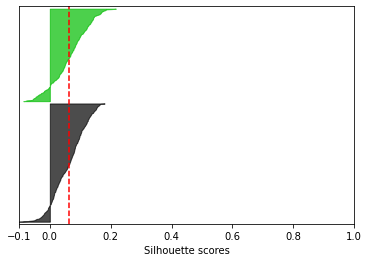

n = 3  : average silhouette_score : 0.055


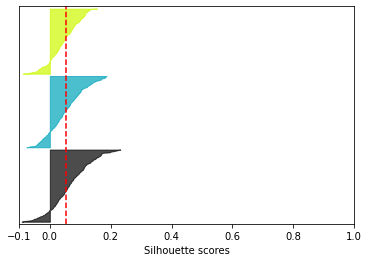

n = 4  : average silhouette_score : 0.048


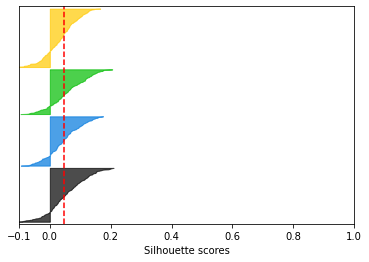

n = 5  : average silhouette_score : 0.066


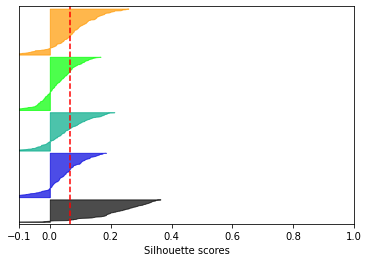

n = 6  : average silhouette_score : 0.06


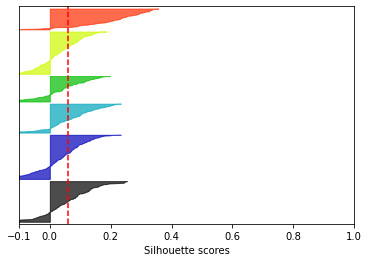

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]
for n in range_n_clusters:
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(gower_mat) + (n + 1) * 10])
    method = KMedoids(n_clusters = n, random_state = 0, metric = 'precomputed', method = 'pam', init =  'k-medoids++').fit(gower_mat)
    cluster_labels = method.fit_predict(gower_mat)

    avg = silhouette_score(gower_mat, cluster_labels)
    print("n =", n," : average silhouette_score :", round(avg,3))
    sample_values = silhouette_samples(gower_mat, cluster_labels)
    y_lower = 10
    for i in range(n):
        ith_cluster = \
            sample_values[cluster_labels == i]
        ith_cluster.sort()
        size_i = ith_cluster.shape[0]
        y_upper = y_lower + size_i
        color = cm.nipy_spectral(float(i) / n)
        plt.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster,facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper + 10 
    plt.xlabel("Silhouette scores")
    plt.axvline(x=avg, color="red", linestyle="--")
    plt.yticks([])  
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

n = 2  : average silhouette_score : 0.143


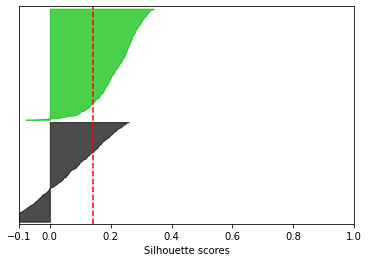

n = 3  : average silhouette_score : 0.12


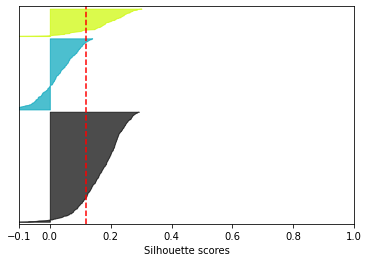

n = 4  : average silhouette_score : 0.096


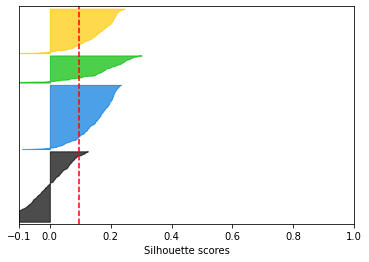

n = 5  : average silhouette_score : 0.116


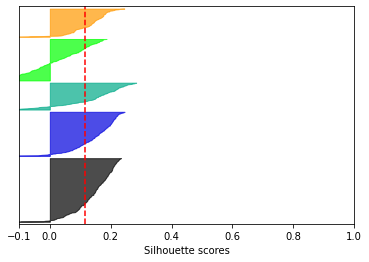

n = 6  : average silhouette_score : 0.107


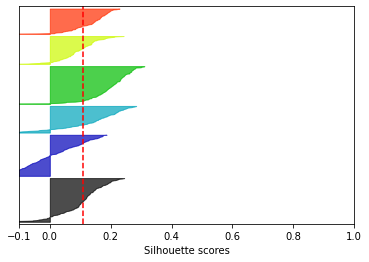

In [33]:
for n in range_n_clusters:
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(gower_mat) + (n + 1) * 10])
    method = AgglomerativeClustering(n_clusters=n, linkage='ward')
    cluster_labels = method.fit_predict(gower_mat)
    avg = silhouette_score(gower_mat, cluster_labels)
    print("n =", n," : average silhouette_score :", round(avg,3))
    sample_values = silhouette_samples(gower_mat, cluster_labels)
    y_lower = 10
    for i in range(n):
        ith_cluster = \
            sample_values[cluster_labels == i]
        ith_cluster.sort()
        size_i = ith_cluster.shape[0]
        y_upper = y_lower + size_i
        color = cm.nipy_spectral(float(i) / n)
        plt.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster,facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper + 10 
    plt.xlabel("Silhouette scores")
    plt.axvline(x=avg, color="red", linestyle="--")
    plt.yticks([])  
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

In [34]:
from kmodes.kprototypes import KPrototypes
random_state = 1234
pd.options.plotting.backend = "plotly"

In [35]:
def plot_cluster(X, y, title="Cluster plot"):
    fig = X.plot.scatter(x='Credit amount', y='Duration', color=y)
    fig.update_layout(autosize=False, width=475, height=475,
                  coloraxis = dict(showscale=False, colorscale='Portland'),
                  font=dict(size=18),
                  title=dict(text=title, x=0.5, y=0.95, xanchor='center'))
    fig.update_traces(marker=dict(size=15))
    return fig

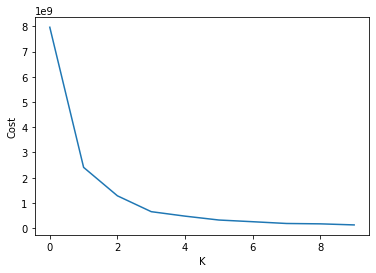

In [36]:
cost = []
for i in list(range(1,11)):
    kp = KPrototypes(n_clusters=i, n_init=1)
    kp.fit_predict(df_cluster, categorical=[3,4,5,6,7,8,9,10])
    cost.append(kp.cost_)
    
plt.plot(cost)
plt.xlabel('K')
plt.ylabel('Cost')
plt.show;

In [37]:
pred = KPrototypes(n_clusters=3,n_init=1).fit_predict(df_cluster, categorical=[3,4,5,6,7,8,9,10])

In [38]:
fig = plot_cluster(df_cluster, pred.astype(float), title="k-prototypes")
fig

In [39]:
df_cluster['Purpose'] = df_cluster['Purpose'].map({'A40':0, 'A41':1, 'A42':2, 'A43':3,'A44':4, 'A45':5, 'A46':6, 'A47':7,'A48':8, 'A49':9, 'A410':10})
df_cluster['Property']= df_cluster['Property'].map({'A121':0, 'A122':1, 'A123':2, 'A124':3})
df_cluster['Installment_plans'] = df_cluster['Installment_plans'].map({'A141':0, 'A142':1, 'A143':2})
df_cluster['Housing'] = df_cluster['Housing'].map({'A151':0, 'A152':1, 'A153':2})

n = 2  : average silhouette_score : 0.722


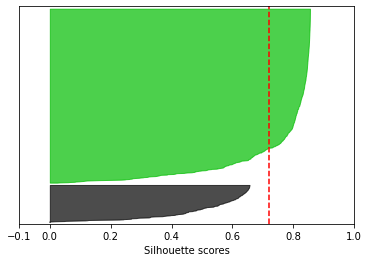

n = 3  : average silhouette_score : 0.648


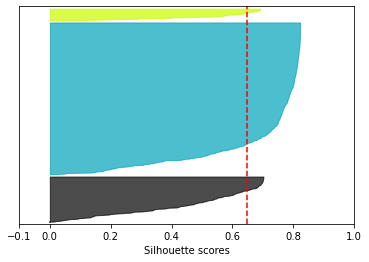

n = 4  : average silhouette_score : 0.612


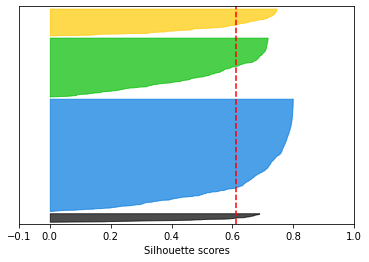

n = 5  : average silhouette_score : 0.566


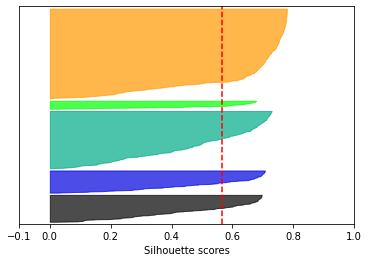

n = 6  : average silhouette_score : 0.576


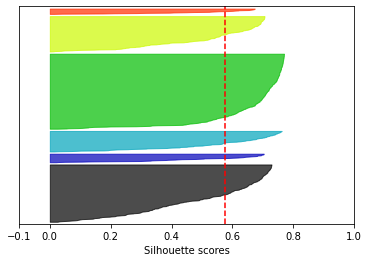

In [40]:
for n in range_n_clusters:
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(df_cluster) + (n + 1) * 10])
    method = KPrototypes(n_clusters=n,n_init=1)
    cluster_labels = method.fit_predict(df_cluster, categorical=[3,4,5,6,7,8,9,10])
    avg = silhouette_score(df_cluster, cluster_labels)
    print("n =", n," : average silhouette_score :", round(avg,3))
    sample_values = silhouette_samples(df_cluster, cluster_labels)
    y_lower = 10
    for i in range(n):
        ith_cluster = \
            sample_values[cluster_labels == i]
        ith_cluster.sort()
        size_i = ith_cluster.shape[0]
        y_upper = y_lower + size_i
        color = cm.nipy_spectral(float(i) / n)
        plt.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster,facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper + 10 
    plt.xlabel("Silhouette scores")
    plt.axvline(x=avg, color="red", linestyle="--")
    plt.yticks([])  
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

## Results

In [41]:
pred = KPrototypes(n_clusters=3,n_init=1).fit_predict(df_cluster, categorical=[3,4,5,6,7,8,9,10])

In [42]:
df_clustered_kproto = df_cluster.assign(Cluster=pred)
summary=df_clustered_kproto.groupby(['Cluster']).mean()
summary

Credit amount        Age   Duration  checking account   Savings  \
Cluster                                                                    
0          1887.438790  35.335626  16.720770          0.987620  1.258597   
1         11695.589286  36.053571  39.660714          1.089286  0.964286   
2          5733.350230  36.119816  30.073733          1.023041  1.018433   

         Credit History   Purpose  Employment  Property  Installment_plans  \
Cluster                                                                      
0              2.562586  2.718019    2.403026  1.189821           1.685007   
1              2.303571  3.214286    2.339286  2.250000           1.571429   
2              2.548387  3.096774    2.331797  1.691244           1.668203   

          Housing  
Cluster            
0        0.884457  
1        1.196429  
2        1.009217

In [43]:
df_clustered_kproto['Cluster'].value_counts()

0    727
2    217
1     56
Name: Cluster, dtype: int64

In [44]:
df_clustered_kproto.groupby('Cluster')['Property'].value_counts()

Cluster  Property
0        0           250
         2           230
         1           168
         3            79
1        3            25
         2            22
         1             7
         0             2
2        2            80
         1            57
         3            50
         0            30
Name: Property, dtype: int64